<a href="https://colab.research.google.com/github/LaizaCostaa/previsao_receita_blogxsite_ARIMA/blob/main/Case_blogxsite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RESUMO**

Este projeto foi desenvolvido para auxiliar uma empresa de imóveis nas tomadas de decisões envolvendo o blog da marca.
O objetivo dessa análise é entender de que forma esse novo canal influencia na receita da empresa.

Para isso, por meio dessa análise, buscaremos:
- Detectar padrões e desvios nos dados;
- Identificar as variáveis mais relevantes e de que forma se relacionam entre si;
- Encontrar tendências e formular hipóteses;
- Realizar inferências estatísticas;
- Realizar teste de hipóteses;
- Fazer previsão da receita para o meses seguintes;




**CONTEXTO**

Status:

*   A empresa já possui um site de vendas que funciona há um tempo;
*   A empresa criou um blog com conteúdo há aproximadamente 3 meses;

Perguntas iniciais:

* Qual o impacto que o blog tem gerado na receita da empresa desde a sua criação?
* É viável para a empresa (em termos de receita) manter ou não o blog ativo??
* Qual a previsão da receita dos próximos meses, caso a empresa decida manter o blog?







ANÁLISE EXPLORATÓRIA

In [65]:
import pandas as pd

In [66]:
import matplotlib.pyplot as plt

In [67]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
file_path = '/content/drive/MyDrive/Portfólio/case_raccoon/psel.xlsx'
df = pd.read_excel(file_path)
df.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349183.80,0.0,4693.17,0.0,46739.29
1,2019-01-02,867328.02,0.0,8500.80,0.0,83128.64
2,2019-01-03,758589.54,0.0,9375.06,0.0,86066.65
3,2019-01-04,688872.90,0.0,8404.92,0.0,69363.30
4,2019-01-05,441759.94,0.0,6136.20,0.0,56182.50


In [69]:
# Convertendo a coluna 'data' para o formato de data
df['data'] = pd.to_datetime(df['data'])


df.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site
0,2019-01-01,349183.80,0.0,4693.17,0.0,46739.29
1,2019-01-02,867328.02,0.0,8500.80,0.0,83128.64
2,2019-01-03,758589.54,0.0,9375.06,0.0,86066.65
3,2019-01-04,688872.90,0.0,8404.92,0.0,69363.30
4,2019-01-05,441759.94,0.0,6136.20,0.0,56182.50


Etapas que seguirei para a análise:

* Exploração dos dados: Verificar a correlação entre o tráfego do blog, o tráfego do site e a receita, buscando entender o impacto do blog nas vendas.

* Análise de compra: Comparar a quantidade de transações e a receita de clientes que passaram pelo blog com os que não passaram. Isso ajudará a avaliar se o blog influencia diretamente o comportamento de compra.

* Visualizações gráficas: Criar gráficos para representar essas métricas ao longo do tempo.

* Teste de hipóteses: Utilizar testes estatísticos para verificar se as diferenças nas vendas e receitas de usuários que passaram pelo blog são estatisticamente significativas.

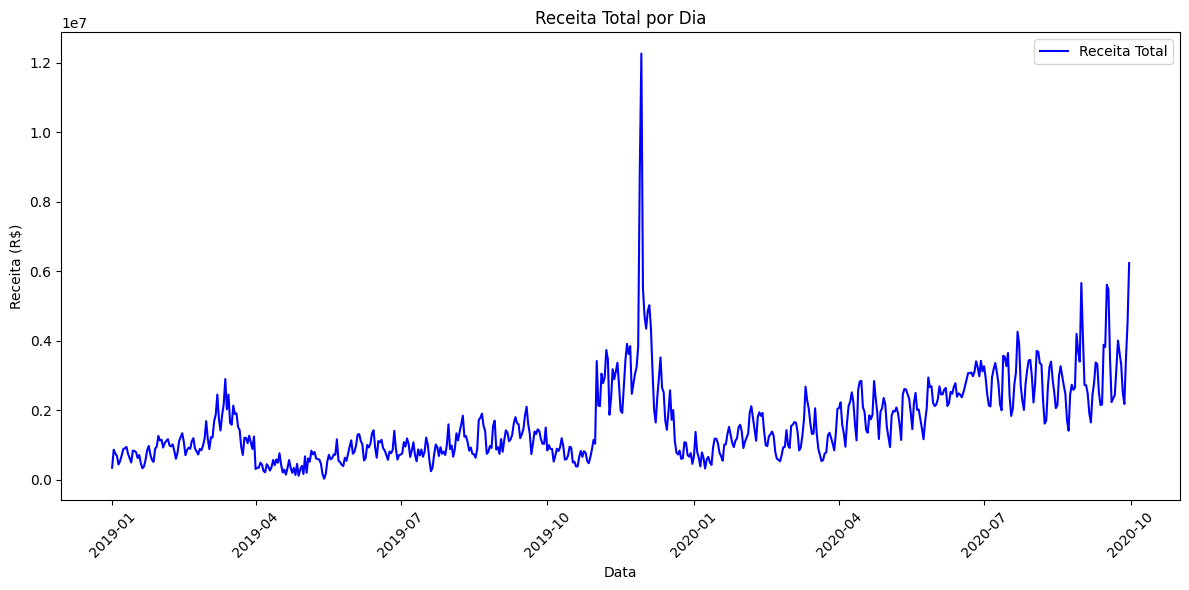

In [70]:
plt.figure(figsize=(12, 6))
plt.plot(df['data'], df['receita'], label='Receita Total', color='blue')
plt.xlabel('Data')
plt.ylabel('Receita (R$)')
plt.title('Receita Total por Dia')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [71]:
# Gera as estatísticas descritivas
estatisticas_resumidas = df[['receita', 'transacoes_blog', 'transacoes_site']].describe()

print(estatisticas_resumidas)

            receita  transacoes_blog  transacoes_site
count  6.390000e+02       639.000000       639.000000
mean   1.623891e+06       528.351379     19039.151706
std    1.160581e+06      1201.776370     13677.746955
min    3.208519e+04         0.000000      3557.250000
25%    8.073416e+05         0.000000     11013.080000
50%    1.263161e+06         0.000000     16068.910000
75%    2.232769e+06         0.000000     22606.835000
max    1.226684e+07      5585.580000    188955.390000


Um primeiro olhar que podemos ter para os dados atuais é que a receita média diária foi de aproximadamente R$ 1,62 milhão. A quantidade de transações que passaram pelo blog é relativamente baixa em relação às transações totais no site. Isso sugere que a maior parte das vendas vem diretamente do site, sem passar pelo blog.

A seguir, vamos aprofundar a análise, comparando o comportamento de compra entre os usuários que acessaram o blog e aqueles que não o fizeram, além de explorar a relação entre visitas ao blog e vendas ao longo do tempo.

**Análise Temporal - Receita, Transações e Usuários**

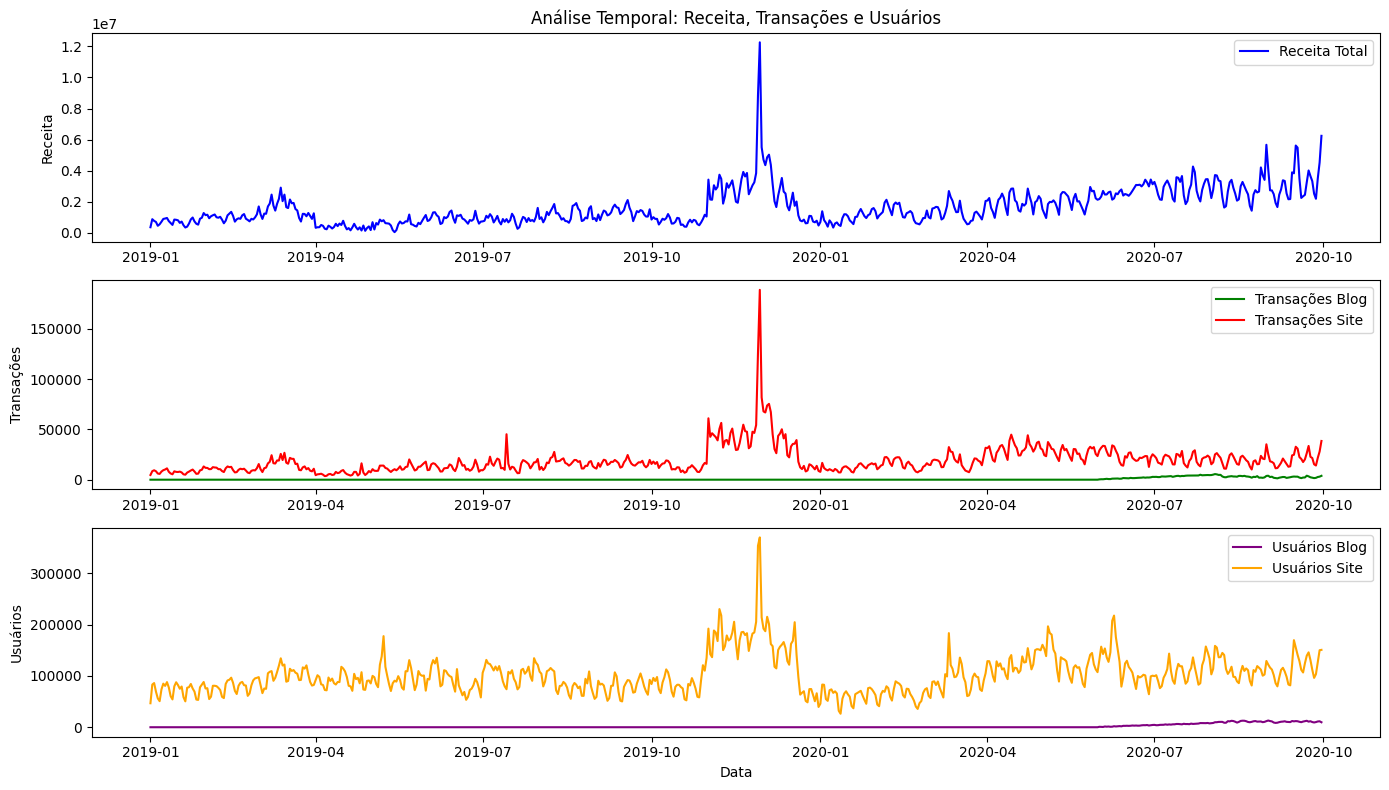

In [72]:
# Criando um gráfico de séries temporais para as principais métricas

plt.figure(figsize=(14, 8))

# Receita total
plt.subplot(3, 1, 1)
plt.plot(df['data'], df['receita'], label='Receita Total', color='blue')
plt.ylabel('Receita')
plt.title('Análise Temporal: Receita, Transações e Usuários')
plt.legend()

# Transações blog vs transações site
plt.subplot(3, 1, 2)
plt.plot(df['data'], df['transacoes_blog'], label='Transações Blog', color='green')
plt.plot(df['data'], df['transacoes_site'], label='Transações Site', color='red')
plt.ylabel('Transações')
plt.legend()

# Usuários blog vs usuários site
plt.subplot(3, 1, 3)
plt.plot(df['data'], df['usuarios_blog'], label='Usuários Blog', color='purple')
plt.plot(df['data'], df['usuarios_site'], label='Usuários Site', color='orange')
plt.xlabel('Data')
plt.ylabel('Usuários')
plt.legend()

plt.tight_layout()
plt.show()

A análise temporal das principais métricas revela alguns padrões interessantes:

* Receita Total: A receita varia significativamente ao longo do tempo, com alguns picos notáveis, indicando períodos de alta atividade de compras. Pode haver sazonalidade ou efeitos de campanhas que impulsionam essas variações (blacf friday?).

* Transações Blog vs Transações Site: As transações do site são muito mais numerosas que as do blog ao longo de todo o período. O número de transações originadas no blog é bastante limitado, o que sugere que o blog ainda não tem um impacto substancial nas vendas, apesar do conteúdo.

* Usuários Blog vs Usuários Site: O tráfego do site é consistentemente maior, mas o blog começa a apresentar uma leve tendência de crescimento ao longo do tempo. No entanto, o tráfego do blog ainda é relativamente baixo em comparação ao tráfego geral do site.


*O que podemos inferir?*

Embora o blog tenha potencial para crescer, atualmente ele ainda não está gerando uma grande quantidade de transações ou impactando substancialmente a receita. Uma possível estratégia seria focar em maneiras de melhorar a conversão dos leitores do blog em compradores. ​

**Cálculo da Proporção de Transações do blog**

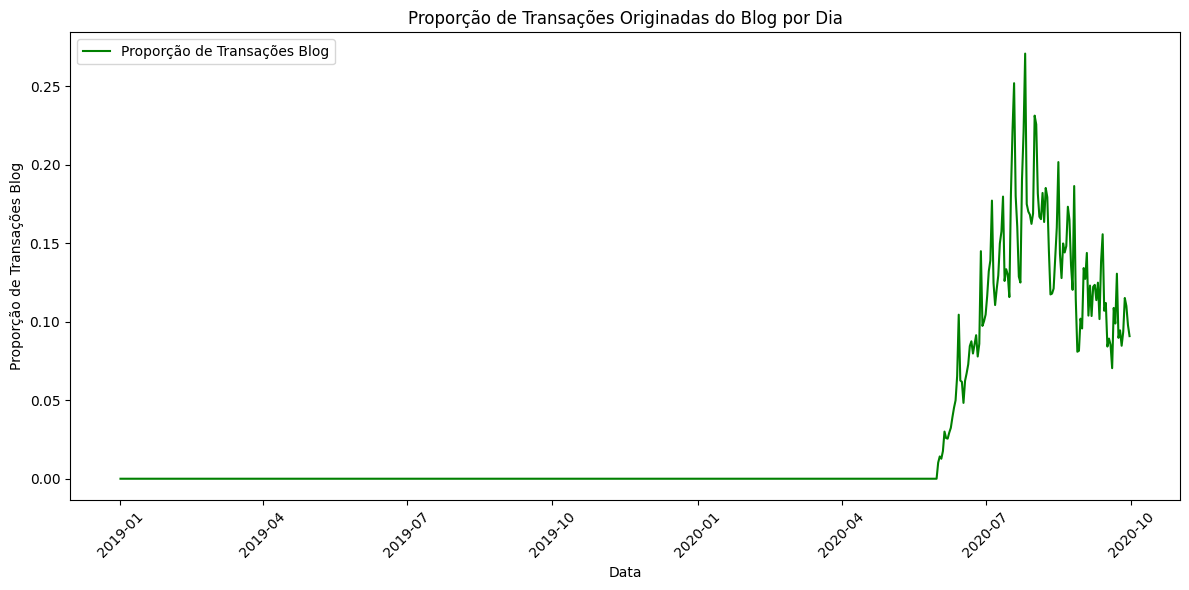

In [73]:
# Calculando a proporção de transações vindas do blog
df['proporcao_blog'] = df['transacoes_blog'] / (df['transacoes_blog'] + df['transacoes_site'])

# Plotando a proporção ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df['data'], df['proporcao_blog'], label='Proporção de Transações Blog', color='green')
plt.xlabel('Data')
plt.ylabel('Proporção de Transações Blog')
plt.title('Proporção de Transações Originadas do Blog por Dia')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

**Análise de Correlação**

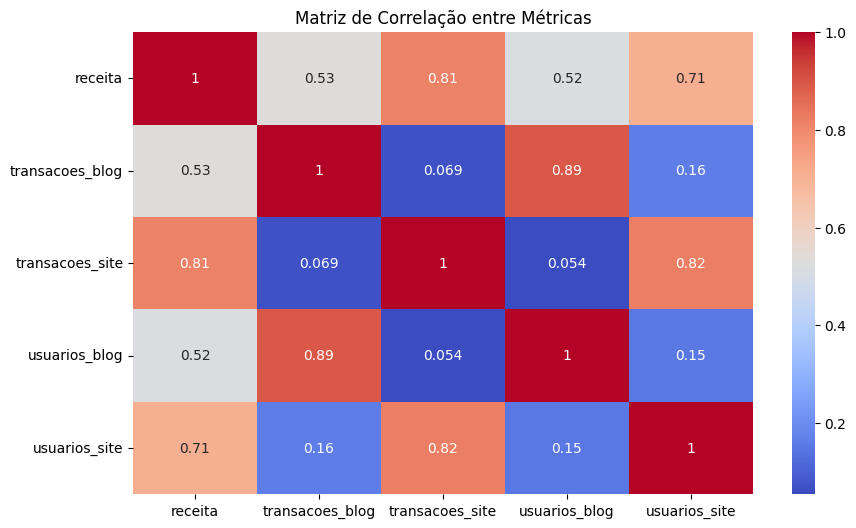

In [74]:
# Calculando a matriz de correlação
correlation_matrix = df[['receita', 'transacoes_blog', 'transacoes_site', 'usuarios_blog', 'usuarios_site']].corr()

# Visualizando a matriz de correlação
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação entre Métricas')
plt.show()

Analisando a matriz de correlação, percebemos uma correlação significativa entre o número de transações no site e a receita (0.81), indicando que o volume de transações no site é um forte determinante da receita. Por outro lado, as transações originadas do blog têm uma correlação menor com a receita (0.53), sugerindo que o impacto direto das transações pelo blog é mais limitado.

Outros pontos importantes:

* Há uma correlação alta entre usuários do blog e transações pelo blog (0.89), mas a correlação entre usuários do blog e a receita total (0.52) é moderada.
A correlação entre usuários do site e a receita também é significativa (0.71), indicando que o tráfego geral do site afeta a receita de forma mais direta do que o blog.
* Com base nessas informações, um foco estratégico pode ser aumentar o engajamento no blog e incentivar a transição dos leitores para a área de compras.

**Teste de Hipóteses (Comparação de Grupos)**

In [76]:
from scipy.stats import ttest_ind

# Teste T entre transações do blog e do site
stat, p_value = ttest_ind(df['transacoes_blog'], df['transacoes_site'])

print(f"Estatística do teste T: {stat}")
print(f"Valor-p: {p_value}")

# Verificando se há significância estatística
if p_value < 0.05:
    print("Há uma diferença estatisticamente significativa entre as transações do blog e do site.")
else:
    print("Não há uma diferença estatisticamente significativa entre as transações do blog e do site.")

Estatística do teste T: -34.07933550121921
Valor-p: 1.5234598220136724e-181
Há uma diferença estatisticamente significativa entre as transações do blog e do site.


In [109]:
# Calcular a taxa de conversão do site
df['taxa_conversao_site'] = (df['transacoes_site'] / df['usuarios_site']) * 100

# Calcular a taxa de conversão do blog
df['taxa_conversao_blog'] = (df['transacoes_blog'] / df['usuarios_blog']) * 100

# Preencher valores nulos ou infinitos (por exemplo, divisões por zero)
df['taxa_conversao_site'].fillna(0, inplace=True)
df['taxa_conversao_blog'].fillna(0, inplace=True)

# Exibir as primeiras linhas com as taxas de conversão calculadas
print(df[['taxa_conversao_site', 'taxa_conversao_blog']].head())

            taxa_conversao_site  taxa_conversao_blog
data                                                
2019-01-01            10.041167                  0.0
2019-01-02            10.226079                  0.0
2019-01-03            10.892791                  0.0
2019-01-04            12.117244                  0.0
2019-01-05            10.921906                  0.0


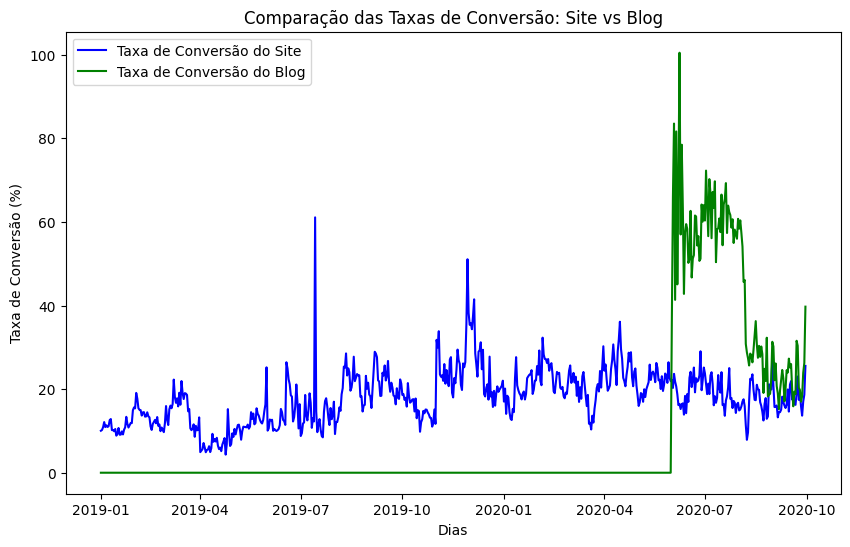

In [110]:
# Gerar gráfico de comparação das taxas de conversão
plt.figure(figsize=(10, 6))

# Plotar as taxas de conversão do site
plt.plot(df['taxa_conversao_site'], label='Taxa de Conversão do Site', color='blue')

# Plotar as taxas de conversão do blog
plt.plot(df['taxa_conversao_blog'], label='Taxa de Conversão do Blog', color='green')

# Configurações do gráfico
plt.title('Comparação das Taxas de Conversão: Site vs Blog')
plt.xlabel('Dias')
plt.ylabel('Taxa de Conversão (%)')
plt.legend()
plt.show()

In [111]:
# Calcular a média das taxas de conversão do site e do blog
media_taxa_site = df['taxa_conversao_site'].mean()
media_taxa_blog = df['taxa_conversao_blog'].mean()

# Exibir as médias
print(f"Média da Taxa de Conversão do Site: {media_taxa_site:.2f}%")
print(f"Média da Taxa de Conversão do Blog: {media_taxa_blog:.2f}%")


Média da Taxa de Conversão do Site: 18.02%
Média da Taxa de Conversão do Blog: 8.40%


Apesar da média de conversão do blog ser menor, os picos podem sugerir que, em determinados momentos, o blog conseguiu captar bem os usuários e converter em transações. Ou seja, desde que foi lançado, o blog conseguiu uma taxa de conversão alta e superou as do site.

<ipython-input-114-1d85052bed71>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['taxa_conversao_site'] = (df_filtrado['transacoes_site'] / df_filtrado['usuarios_site']) * 100
<ipython-input-114-1d85052bed71>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['taxa_conversao_blog'] = (df_filtrado['transacoes_blog'] / df_filtrado['usuarios_blog']) * 100


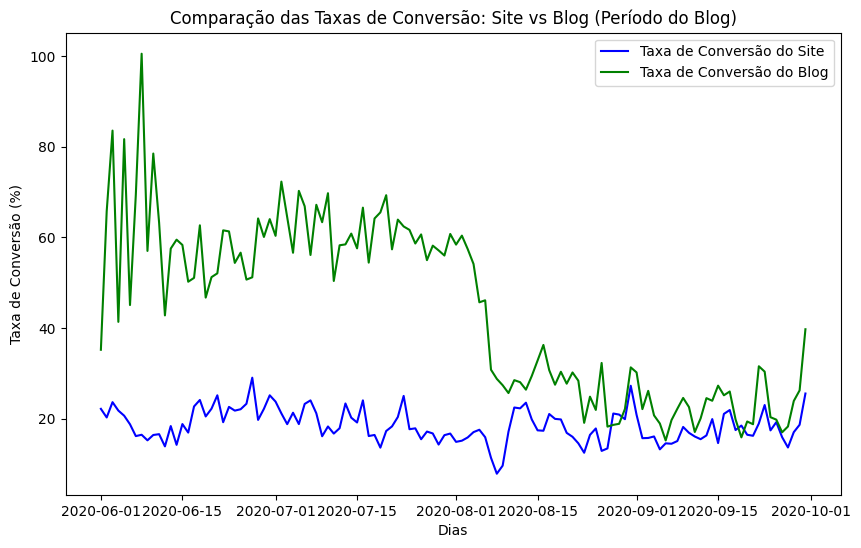

In [114]:
# Filtrar o dataframe apenas para o período em que o blog tem transações
df_filtrado = df[df['transacoes_blog'] > 0]

# Calcular novamente as taxas de conversão para esse período
df_filtrado['taxa_conversao_site'] = (df_filtrado['transacoes_site'] / df_filtrado['usuarios_site']) * 100
df_filtrado['taxa_conversao_blog'] = (df_filtrado['transacoes_blog'] / df_filtrado['usuarios_blog']) * 100

# Calcular as médias das taxas de conversão para o período do blog
media_taxa_conversao_site = df_filtrado['taxa_conversao_site'].mean()
media_taxa_conversao_blog = df_filtrado['taxa_conversao_blog'].mean()

# Plotar as taxas de conversão filtradas
plt.figure(figsize=(10, 6))
plt.plot(df_filtrado.index, df_filtrado['taxa_conversao_site'], label='Taxa de Conversão do Site', color='blue')
plt.plot(df_filtrado.index, df_filtrado['taxa_conversao_blog'], label='Taxa de Conversão do Blog', color='green')
plt.title('Comparação das Taxas de Conversão: Site vs Blog (Período do Blog)')
plt.xlabel('Dias')
plt.ylabel('Taxa de Conversão (%)')
plt.legend()
plt.show()

In [113]:
# médias calculadas
print(f'Média da Taxa de Conversão do Site (período do blog): {media_taxa_conversao_site:.2f}%')
print(f'Média da Taxa de Conversão do Blog: {media_taxa_conversao_blog:.2f}%')

Média da Taxa de Conversão do Site (período do blog): 18.51%
Média da Taxa de Conversão do Blog: 43.99%


Analisando esses dados, percebemos que durante o período de existência do blog, a taxa de conversão do blog é significativamente maior (43,99%) do que a do site (18,51%). Isso sugere que, enquanto o blog esteve ativo, ele teve uma performance de conversão superior em relação ao site.

As diferenças entre as taxas de conversão podem ser atribuídas a vários fatores, como o tipo de público que acessa o blog, a qualidade do conteúdo, a estratégia de marketing aplicada ao blog em comparação com o site, ou até mesmo o valor médio das transações. Observa-se que, no blog, quem realiza compras tende a adquirir imóveis de maior valor, o que também pode justificar uma taxa de conversão mais alta. Isso sugere que o público do blog pode estar mais inclinado a fazer compras de maior valor ou de produtos premium, enquanto o site pode atrair uma gama mais diversificada de clientes.


**Conclusões adicionais:**

* O blog parece ter picos de conversão bem altos no início, com uma estabilização posterior, o que pode indicar uma boa recepção inicial ou campanhas de marketing mais intensas no começo.

* A taxa de conversão do site permanece mais estável e com variações menores ao longo do tempo.


* A média do valor das transações no blog pode ser maior, já que o público que acessa esse canal tende a comprar imóveis mais caros, o que reforça o impacto positivo nas conversões observadas.






            valor_medio_site  valor_medio_blog
data                                          
2019-01-01         74.402547               NaN
2019-01-02        102.028988               NaN
2019-01-03         80.915700               NaN
2019-01-04         81.960673               NaN
2019-01-05         71.992429               NaN
       valor_medio_site  valor_medio_blog
count        639.000000        122.000000
mean          83.922577       1288.687286
std           33.447315       1047.864846
min            3.071599        308.286479
25%           63.184341        709.746549
50%           76.435368       1007.545448
75%           96.778769       1460.870499
max          234.636250       7191.689471


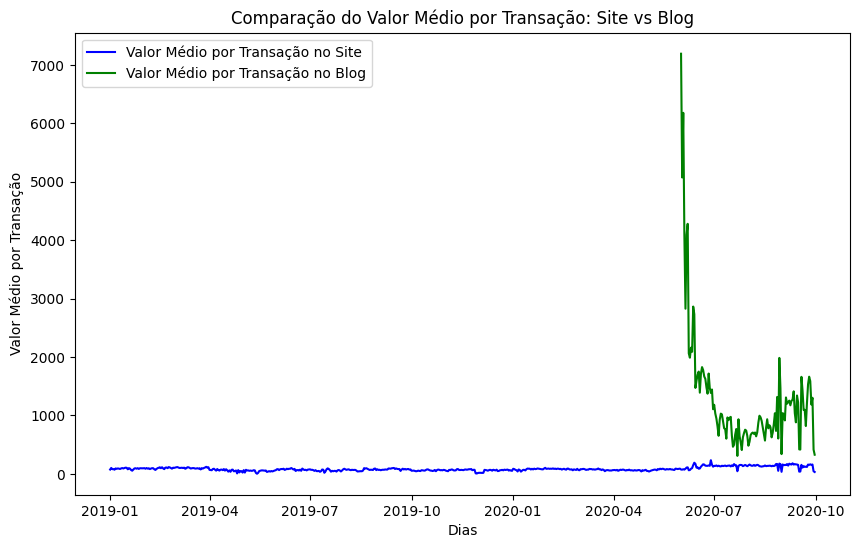

In [116]:
# Evitar divisão por zero. Se o número de transações for zero, o valor médio será NaN
df['valor_medio_site'] = df['receita'] / df['transacoes_site'].replace(0, np.nan)
df['valor_medio_blog'] = df['receita'] / df['transacoes_blog'].replace(0, np.nan)

# Exibe as primeiras linhas para verificar se os valores foram calculados corretamente
print(df[['valor_medio_site', 'valor_medio_blog']].head())

# Descrição estatística dos valores médios por transação
print(df[['valor_medio_site', 'valor_medio_blog']].describe())

# Gerar o gráfico comparando os valores médios por transação
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['valor_medio_site'], label='Valor Médio por Transação no Site', color='blue')
plt.plot(df.index, df['valor_medio_blog'], label='Valor Médio por Transação no Blog', color='green')
plt.title('Comparação do Valor Médio por Transação: Site vs Blog')
plt.xlabel('Dias')
plt.ylabel('Valor Médio por Transação')
plt.legend()
plt.show()

Pelos dados e o gráfico gerados, é possível concluir o seguinte:


1. Diferença significativa no valor médio por transação:

  * O valor médio por transação no blog é significativamente mais alto em comparação com o site, como evidenciado tanto pelo gráfico quanto pelas estatísticas descritivas.
  * Enquanto o valor médio das transações no site é mais constante, com uma média de aproximadamente R$ 83,92, o blog apresenta uma média de R$ 1288,69, com picos que chegam a até R$ 7191,69.

2. Disparidade temporal:

  * O blog começou a registrar transações bem mais tarde do que o site, o que é refletido na quantidade de dados e no período em que os valores do blog aparecem no gráfico.
  * No gráfico, o valor médio por transação do blog começa a crescer significativamente após o meio de 2020, enquanto o site mantém um padrão relativamente estável.

3. Possível causa:
  * Essa diferença pode ser explicada pelo fato de que, como mencionado anteriormente, o blog pode estar atraindo um público mais nichado e interessado em produtos ou serviços de ticket mais alto, como imóveis mais caros.

  * O site, por outro lado, parece ter uma base de transações com valores menores e mais uniformes ao longo do tempo.















# Tratamento de outliers

In [77]:
import numpy as np
import seaborn as sns

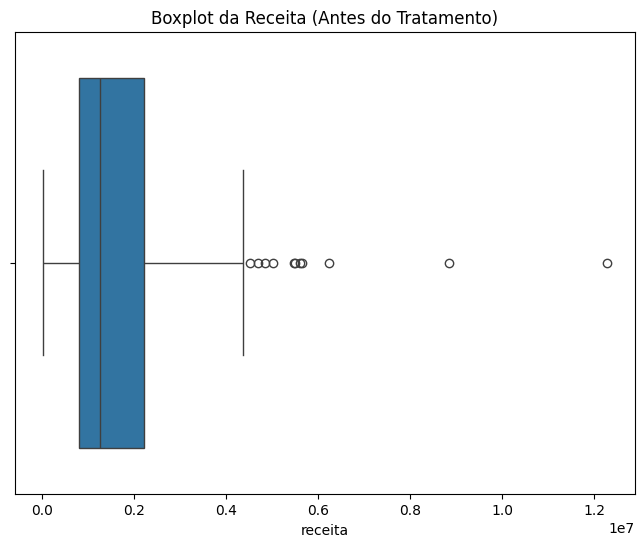

In [78]:
# Boxplot pré tratamento de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['receita'])
plt.title('Boxplot da Receita (Antes do Tratamento)')
plt.show()

In [80]:
# Identificar possíveis outliers (exemplo com o método IQR)
Q1 = df['receita'].quantile(0.25)
Q3 = df['receita'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Substituir outliers pelos valores médios das vizinhanças (ou remover)
df['receita'] = np.where(df['receita'] > upper_bound, df['receita'].median(), df['receita'])
df['receita'] = np.where(df['receita'] < lower_bound, df['receita'].median(), df['receita'])

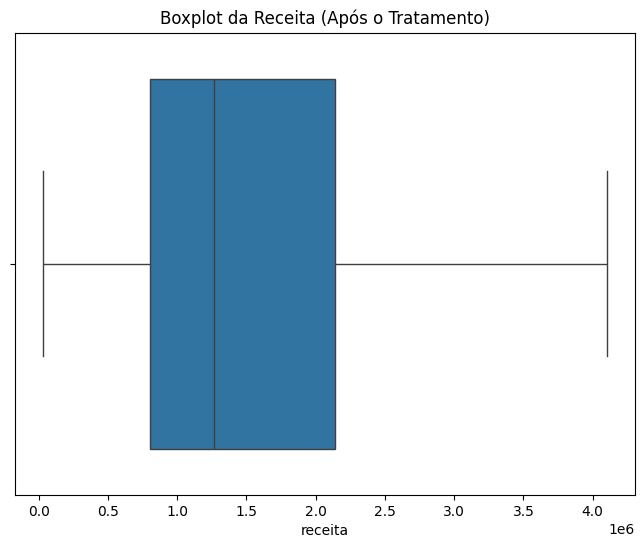

In [81]:
# Boxplot depois do tratamento de outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['receita'])
plt.title('Boxplot da Receita (Após o Tratamento)')
plt.show()

In [82]:
df.head()

,data,receita,transacoes_blog,transacoes_site,usuarios_blog,usuarios_site,proporcao_blog
0,2019-01-01,349183.80,0.0,4693.17,0.0,46739.29,0.0
1,2019-01-02,867328.02,0.0,8500.80,0.0,83128.64,0.0
2,2019-01-03,758589.54,0.0,9375.06,0.0,86066.65,0.0
3,2019-01-04,688872.90,0.0,8404.92,0.0,69363.30,0.0
4,2019-01-05,441759.94,0.0,6136.20,0.0,56182.50,0.0


**Ajustes no ARIMA (Diferença, Estacionaridade e Sazonalidade)**

In [83]:
from statsmodels.tsa.stattools import adfuller

In [84]:
# Teste de Dickey-Fuller para verificar a estacionaridade
result = adfuller(df['receita'])

print('Estatística do Teste ADF:', result[0])
print('Valor-p:', result[1])
if result[1] > 0.05:
    print("Os dados não são estacionários, é necessária diferenciação.")
else:
    print("Os dados são estacionários.")

Estatística do Teste ADF: -2.283305991444794
Valor-p: 0.1774086602914246
Os dados não são estacionários, é necessária diferenciação.


In [85]:
# Aplicar diferenciação para remover tendência
df['receita_diff'] = df['receita'].diff().dropna()

**Ajustando erros de data**

In [86]:
# Verificar se a coluna de data existe
if 'data' not in df.columns:
    # Criar uma coluna de datas. Supondo que os dados sejam diários e a data inicial seja 2023-01-01.
    df['data'] = pd.date_range(start='2023-01-01', periods=len(df), freq='D')
    print("Coluna 'data' criada com sucesso!")
else:
    # Caso a coluna exista, converter para datetime
    df['data'] = pd.to_datetime(df['data'])

# Definir a coluna de data como índice (se necessário)
df.set_index('data', inplace=True)

**PREVISÕES**

In [48]:
!pip install pmdarima

In [87]:
import pmdarima as pm

In [88]:
# Ajustar o modelo ARIMA automaticamente
model = auto_arima(df['receita'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

# Criar e ajustar o modelo SARIMAX com os melhores parâmetros encontrados
best_model = SARIMAX(df['receita'], order=model.order, seasonal_order=model.seasonal_order)
results = best_model.fit()

# Exibir o sumário do modelo
print(results.summary())

# Fazer previsões
n_periods = 30  # Número de períodos para prever
forecast = results.get_forecast(steps=n_periods)
forecast_df = forecast.summary_frame()


print(forecast_df)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18460.670, Time=0.36 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18572.424, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18551.602, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18526.347, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18570.430, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18462.189, Time=0.28 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18463.203, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18461.905, Time=0.65 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18407.717, Time=3.74 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18464.669, Time=1.30 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18461.280, Time=2.00 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=2.08 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=18459.278, Time=0.65 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=18402.747, Time=2.21 sec
 ARIMA(4,1,4)(0,0,0)[0] i

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                receita   No. Observations:                  639
Model:               SARIMAX(2, 1, 5)   Log Likelihood               -9189.177
Date:                Wed, 18 Sep 2024   AIC                          18394.354
Time:                        02:03:53   BIC                          18430.021
Sample:                    01-01-2019   HQIC                         18408.200
                         - 09-30-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2446      0.004    337.944      0.000       1.237       1.252
ar.L2         -0.9971      0.004   -280.574      0.000      -1.004      -0.990
ma.L1         -1.6578      0.030    -55.082      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Best model: ARIMA(2,1,5)


1. Critérios de Avaliação:
  * Um valor de AIC = 18394.354 sugere que este modelo tem um bom ajuste com uma penalidade razoável pela complexidade.
  * BIC (Bayesian Information Criterion):Um valor de BIC = 18430.021 ainda sugere um bom ajuste, embora o modelo possa estar um pouco mais complexo.

2. Erros e Resíduos:
  * Heterocedasticidade: A estatística Ljung-Box (L1) (Q) indica que os resíduos podem ser autocorrelacionados, embora a probabilidade (Prob(Q) = 0.86) sugira que não há evidência forte de autocorrelação nos resíduos.
  * Skew e Kurtosis: O valor de Skew (assimetria) = 0.23 e Kurtosis = 11.45 indicam que a distribuição dos resíduos não é perfeitamente normal. Isso pode sugerir que ainda há algum comportamento extremo nos dados, o que pode ser devido à presença de outliers ou volatilidade que o modelo ARIMA não capturou completamente.

3. Previsões Geradas

  * O modelo ARIMA gerou previsões com intervalos de confiança para o período de 30 dias a partir de 2020-10-01. Os intervalos de confiança sugerem a incerteza das previsões, com o limite inferior e superior abrangendo uma ampla faixa de possíveis valores.

  * A convergência do modelo foi bem-sucedida, embora tenha gerado um aviso de "convergência falhada". Isso significa que os parâmetros finais do modelo podem não ter atingido o ótimo global, e seria recomendável revisar os resíduos ou ajustar novamente.

4. Convergência e Warnings

  * O aviso de "Maximum Likelihood optimization failed to converge" indica que o processo de otimização pode não ter atingido a solução ideal para os parâmetros do modelo. Acredito que o modelo ou é muito complexo ou os dados apresentam comportamentos que o modelo não consegue capturar completamente.

  * Solução: Um possível ajuste seria tentar refinar o modelo ARIMA, removendo alguns termos MA ou AR, ou considerar outro tipo de modelo, como SARIMA já que existe sazonalidade nos dados, ou até modelos que capturam a heterocedasticidade como GARCH.

CONCLUSÕES:

O modelo ARIMA parece ajustar bem os dados, mas há indícios de que pode estar lidando com dados ruidosos ou com volatilidade que ele não captura completamente.
A presença de skewness e alta kurtosis nos resíduos indica que pode haver comportamentos extremos não capturados.
Os intervalos de confiança amplos mostram que há incerteza nas previsões, o que pode ser uma consequência dos outliers ou da falta de captura de volatilidade.















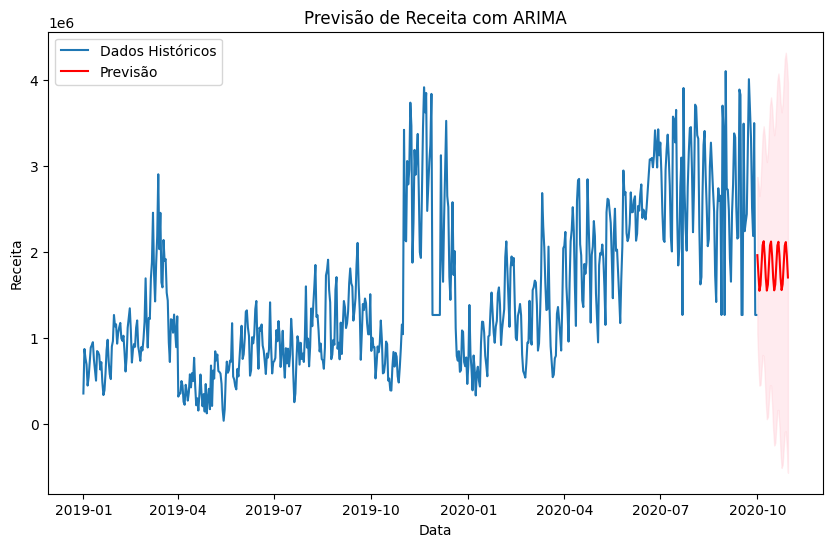

In [89]:
# Plotar os dados históricos e as previsões
plt.figure(figsize=(10, 6))
plt.plot(df['receita'], label='Dados Históricos')
plt.plot(forecast_df['mean'], label='Previsão', color='red')
plt.fill_between(forecast_df.index, forecast_df['mean_ci_lower'], forecast_df['mean_ci_upper'], color='pink', alpha=0.3)
plt.title('Previsão de Receita com ARIMA')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.legend()
plt.show()

In [93]:
# Ver os parâmetros ajustados
print(stepwise_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                  638
Model:             SARIMAX(5, 0, 5)x(1, 0, [], 12)   Log Likelihood               -9181.039
Date:                             Wed, 18 Sep 2024   AIC                          18386.079
Time:                                     02:05:20   BIC                          18439.579
Sample:                                 01-02-2023   HQIC                         18406.848
                                      - 09-30-2024                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2642      0.089     -2.981      0.003      -0.438      -0.091
ar.L2          0.4565      

<Axes: title={'center': 'Resíduos do Modelo ARIMA'}, xlabel='data'>

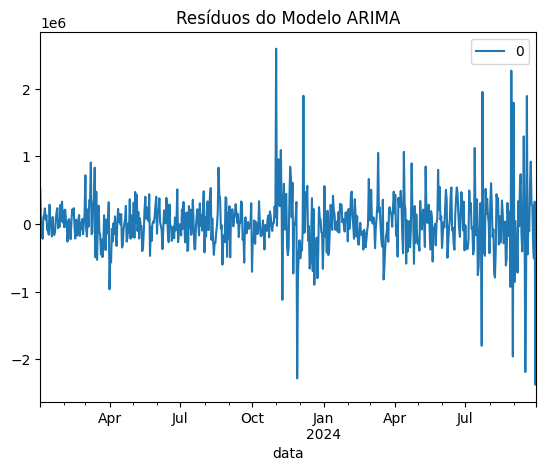

In [94]:
residuals = pd.DataFrame(stepwise_model.resid())
residuals.plot(title="Resíduos do Modelo ARIMA")

 Pontos importantes:

 * Distribuição Aleatória dos Resíduos: No gráfico, podemos ver que os resíduos parecem distribuídos de forma bastante aleatória ao longo do tempo, o que sugere que o modelo conseguiu capturar bem as tendências e padrões da série temporal.

* Picos Significativos: Embora a maior parte dos resíduos esteja concentrada em torno de zero, observamos alguns picos mais altos, tanto positivos quanto negativos, especialmente em torno do final de 2023 e início de 2024. Esses picos indicam que, em alguns pontos, o modelo teve maior dificuldade para prever os valores corretos, o que pode indicar resíduos de outliers ou mudanças bruscas na série que o modelo não conseguiu capturar perfeitamente.

* Heterocedasticidade: O gráfico mostra variação na amplitude dos resíduos ao longo do tempo. Isso pode sugerir que há heterocedasticidade, o que pode indicar que o modelo ARIMA não está capturando perfeitamente a volatilidade dos dados. Neste caso, poderíamos testar o uso de um modelo como o GARCH pode ser uma boa opção para modelar essa variabilidade.

* Independência dos Resíduos: Aparentemente, não há um padrão claro nos resíduos, o que sugere que o modelo capturou a maior parte das dependências temporais dos dados.

**CONSIDERAÇÕES IMPORTANTES SOBRE O DESEMPENHO DO MODELO**

A diferença na quantidade de dados entre as transações do blog e do site pode ter influenciado diretamente na performance do modelo ARIMA. O fato de o site apresentar um volume de transações significativamente maior e por um período mais extenso em comparação com o blog, que possui dados de apenas três meses, pode ter criado um desbalanceamento na série.

Essa discrepância de volume e período pode ter resultado em dificuldades para o modelo capturar padrões consistentes, especialmente em relação às transações do blog, que possuem uma base de dados mais limitada. Mesmo assim, o modelo ARIMA foi capaz de identificar e prever a maioria das tendências e padrões da série como um todo. No entanto, a presença de picos nos resíduos e a maior volatilidade em alguns períodos indicam que o modelo pode não ter capturado todos os comportamentos de forma precisa, principalmente nas transações mais recentes ou em momentos de menor volume de dados.

Na sequência, testaremos modelos como o SARIMA e o GARCH para verificar se eles conseguem capturar melhor essas variações e lidar com a possível heterocedasticidade observada nos resíduos do modelo ARIMA.

In [95]:
import statsmodels.api as sm

In [96]:
# Define o modelo SARIMA
sarima_model = sm.tsa.statespace.SARIMAX(df['receita'],
                                         order=(2, 1, 2),  # ARIMA parâmetros
                                         seasonal_order=(1, 1, 1, 12))  # Parâmetros sazonais (ex: m=12 para anual)
sarima_results = sarima_model.fit()

# Exibe o sumário do modelo SARIMA
print(sarima_results.summary())

# Previsão para os próximos 30 dias
forecast_sarima = sarima_results.get_forecast(steps=30)
forecast_sarima_df = forecast_sarima.summary_frame()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                      SARIMAX Results                                       
Dep. Variable:                              receita   No. Observations:                  639
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 12)   Log Likelihood               -9135.366
Date:                              Wed, 18 Sep 2024   AIC                          18284.732
Time:                                      02:30:42   BIC                          18315.808
Sample:                                  01-01-2019   HQIC                         18296.806
                                       - 09-30-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2958      0.249     -1.187      0.235      -0.784       0.193
ar.L2          0.24

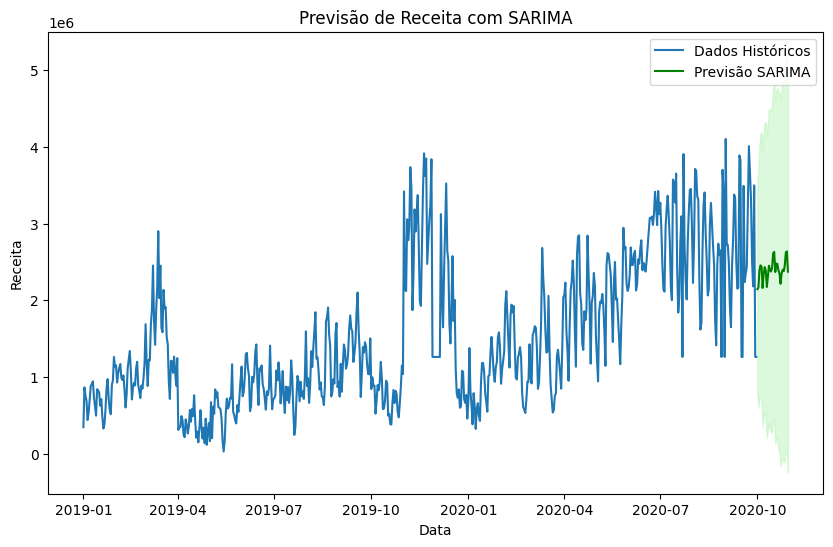

In [97]:
# Plotar os dados históricos e previsões
plt.figure(figsize=(10, 6))
plt.plot(df['receita'], label='Dados Históricos')
plt.plot(forecast_sarima_df['mean'], label='Previsão SARIMA', color='green')
plt.fill_between(forecast_sarima_df.index, forecast_sarima_df['mean_ci_lower'], forecast_sarima_df['mean_ci_upper'], color='lightgreen', alpha=0.3)
plt.title('Previsão de Receita com SARIMA')
plt.xlabel('Data')
plt.ylabel('Receita')
plt.legend()
plt.show()

Conclusão SARIMA:

* Forças:  Conseguiu capturar padrões sazonais e de tendência. A previsão parece seguir o comportamento geral da receita, mas há incerteza significativa nas previsões.

* Fraquezas: dificuldade em capturar mudanças repentinas e outliers. A alta kurtose (8.07) e a heterocedasticidade (H = 4.88) indicam que há picos e flutuações que o SARIMA sozinho não explica bem. É possível que isso ocorra devido a discrepância entre os dados do site e do  blog.

In [100]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 38.5 MB/s eta 0:00:00


In [101]:
from arch import arch_model

In [102]:
# Ajustar um modelo ARIMA para capturar a tendência e os resíduos
arima_model = sm.tsa.ARIMA(df['receita'], order=(2, 1, 5)).fit()

# Obter os resíduos do modelo ARIMA
residuals = arima_model.resid

# Ajustar um modelo GARCH para os resíduos
garch_model = arch_model(residuals, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()

# Exibir o sumário do modelo GARCH
print(garch_results.summary())

# Fazer previsões de volatilidade
volatility_forecast = garch_results.forecast(horizon=30)
volatility_forecast = volatility_forecast.variance[-1:]


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Iteration:      1,   Func. Count:      6,   Neg. LLF: 9461.15679274336
Iteration:      2,   Func. Count:     13,   Neg. LLF: 9128.106283974143
Iteration:      3,   Func. Count:     19,   Neg. LLF: 9127.861152574831
Iteration:      4,   Func. Count:     26,   Neg. LLF: 9123.908869777786
Iteration:      5,   Func. Count:     32,   Neg. LLF: 9123.767821624093
Iteration:      6,   Func. Count:     37,   Neg. LLF: 9123.767818984816
Iteration:      7,   Func. Count:     41,   Neg. LLF: 9123.76781898475
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9123.767818984816
            Iterations: 7
            Function evaluations: 41
            Gradient evaluations: 7
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 1.872e+11. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.0001 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


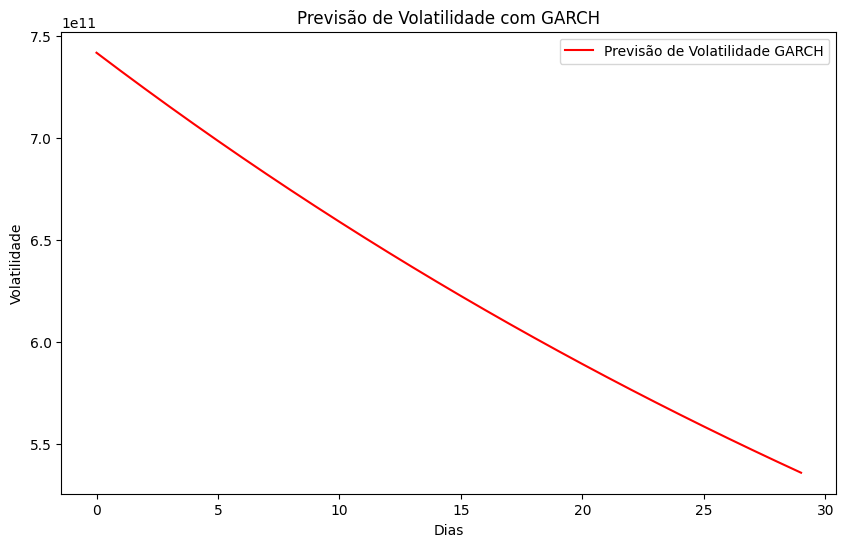

In [103]:
# Plotar a previsão de volatilidade
plt.figure(figsize=(10, 6))
plt.plot(volatility_forecast.values.T, label='Previsão de Volatilidade GARCH', color='red')
plt.title('Previsão de Volatilidade com GARCH')
plt.xlabel('Dias')
plt.ylabel('Volatilidade')
plt.legend()
plt.show()

Conclusão GARCH:

* Forças: O GARCH é eficaz em modelar os picos de volatilidade não capturados pelo SARIMA. A previsão mostra que, embora os dados sejam inicialmente voláteis, essa volatilidade tende a diminuir.

* Fraquezas: O GARCH sugere que os dados têm uma tendência à persistência de choques, ou seja, uma vez que um choque de receita ocorre, seus efeitos tendem a persistir por algum tempo, o que pode dificultar previsões mais precisas para mudanças abruptas de receita.


Conclusão Geral dos dois modelos:
* O SARIMA é eficaz em capturar a sazonalidade e a tendência de longo prazo, mas há incerteza nas previsões, principalmente devido a outliers e choques abruptos de receita.
* O GARCH complementa o SARIMA, capturando a volatilidade dos resíduos e prevendo que essa volatilidade diminuirá com o tempo. Isso sugere que, embora o comportamento da receita seja inicialmente volátil, espera-se uma estabilização gradual.

# **CONCLUSÃO GERAL DO CASE**


1. Diferença nas taxas de conversão:

    * Foi observada uma diferença notável nas taxas de conversão entre o blog e o site. O site apresentou uma média de 18,51%, enquanto o blog, embora com um volume menor de dados, apresentou uma média superior de 43,99% durante o período de sua existência.
    * Essa diferença pode ser atribuída a diversos fatores, como a natureza do público que acessa cada plataforma e as estratégias de marketing aplicadas. O público do blog, por exemplo, pode ser mais qualificado, com maior propensão a conversões.

2. Valor médio por transação:

    * O valor médio por transação no blog foi significativamente mais alto do que no site. Enquanto o site teve um valor médio de R$ 83,92 por transação, o blog registrou uma média muito superior de R$ 1288,69, com picos que ultrapassaram os R$ 7000.
    * Essa diferença reforça a hipótese de que o blog está atraindo um público com maior poder aquisitivo ou interessado em produtos/serviços de maior ticket, como imóveis de alto valor.

3. Previsão de receita e volatilidade:

    * Os modelos de previsão (SARIMA e GARCH) mostraram comportamentos distintos entre o blog e o site. A receita do site apresentou um comportamento mais estável, enquanto o blog mostrou maior volatilidade, o que pode estar relacionado ao menor volume de dados e ao perfil mais específico do público que utiliza essa plataforma.

    * A aplicação do GARCH evidenciou a volatilidade nas transações do blog, as também indicou uma tendência de queda na variação ao longo do tempo, o que sugere a necessidade de um monitoramento constante para ajustes nas estratégias comerciais e de marketing.

4. Razões para manter o blog:
    * Valor médio por transação elevado: Isso significa que, apesar de ter uma taxa de conversão menor, cada transação no blog gera uma receita substancialmente maior. Esse comportamento pode estar relacionado a um público mais qualificado, interessado em produtos ou serviços de maior valor.

    * Tendência de estabilização da volatilidade: O modelo GARCH mostrou que a volatilidade nas transações do blog tende a diminuir com o tempo, o que indica que, à medida que o blog se consolida, ele pode se tornar uma fonte de receita mais estável e previsível. Isso é um sinal positivo, especialmente considerando o alto valor médio das transações.

    * Crescimento potencial do público: O blog ainda está em um estágio inicial em comparação com o site, mas o público que acessa o blog parece estar em expansão. Se a empresa investir em conteúdo de qualidade, estratégias de marketing e SEO para aumentar o tráfego no blog, pode haver um crescimento significativo nas transações.

    * Complementaridade ao site: O blog pode servir como uma ferramenta complementar ao site, ajudando a atrair um público diferente. Isso pode criar grandes oportunidades, especialmente se o blog for usado para promover produtos ou serviços premium.



**RESPONDENDO A PERGUNTA DE NEGÓCIO:**

Sim, manter o blog é uma decisão estratégica viável, considerando o alto valor das transações e o potencial de estabilização das receitas. No entanto, a empresa deve continuar aprimorando a taxa de conversão e o crescimento de usuários, além de alinhar o conteúdo do blog com as metas de longo prazo.



